In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
trainF = pd.read_csv('./Data/trainF.csv')
trainP = pd.read_csv('./Data/trainP.csv')
testF = pd.read_csv('./Data/testF.csv')
testP = pd.read_csv('./Data/testP.csv')


In [3]:
trainF = trainF.drop("TimeStamp",1)
testF= testF.drop("TimeStamp",1)
trainP = trainP.drop("TimeStamp",1)
testP= testP.drop("TimeStamp",1)

In [4]:
trainF = trainF.drop("Unnamed: 0",1)

In [5]:
testF= testF.drop("Unnamed: 0",1)
trainP = trainP.drop("Unnamed: 0",1)
testP= testP.drop("Unnamed: 0",1)

In [33]:
# periodic 
X_train_P = trainP.iloc[:,:-2]
X_test_P = testP.iloc[:,:-2]

Y_train_P = trainP['ReadsAvg']
Y_test_P = testP['ReadsAvg']


In [38]:
# flash
X_train_F = trainF.iloc[:,:-2]
X_test_F = testF.iloc[:,:-2]

Y_train_F = trainF['ReadsAvg']
Y_test_F = testF['ReadsAvg']


### combine 2 traces

In [14]:
trainC = pd.concat([trainF,trainP], join='inner')
#testC = pd.concat([testF,testP], join='inner')

In [15]:
print(trainC.shape)
print(testC.shape)

(16941, 1715)
(7262, 1715)


In [17]:
# Extract X,Y components from test and train sets

X_train = trainC.iloc[:,:-2]
X_test = testC.iloc[:,:-2]

Y_train = trainC["ReadsAvg"]
Y_test =testC["ReadsAvg"]


### correlation

In [40]:
from scipy.stats import pearsonr

In [40]:
corr  = []
for i in range(X_train.shape[1]):
    #print(i)
    tmp1, tmp2 = pearsonr(X_train.iloc[:,i].values, Y_train.values.reshape(-1))
    corr.append(tmp1)

In [52]:
read_p_c = DataFrame(corr, index=X_train.columns,columns = ['pc'])

In [41]:
# flash
corrF  = []
for i in range(X_train_F.shape[1]):
    #print(i)
    tmp1, tmp2 = pearsonr(X_train_F.iloc[:,i].values, Y_train_F.values.reshape(-1))
    corrF.append(tmp1)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [52]:
read_p_c_F = DataFrame(corrF, index=X_train_F.columns,columns = ['pc'])
read_p_c_F.sort_values(ascending=False,by = 'pc').to_csv("./Data/readF_p_c.csv")

In [53]:
# peri
corrP  = []
for i in range(X_train_P.shape[1]):
    #print(i)
    tmp1, tmp2 = pearsonr(X_train_P.iloc[:,i].values, Y_train_P.values.reshape(-1))
    corrP.append(tmp1)

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [54]:
read_p_c_P = DataFrame(corrP, index=X_train_P.columns,columns = ['pc'])
read_p_c_P.sort_values(ascending=False,by = 'pc').to_csv("./Data/readP_p_c.csv")

In [58]:
read_p_c_P.sort_values(ascending=False,by = 'pc')

,pc
1_i127_intr.s,0.702175
1_iseg.s,0.690102
1_irec.s,0.690087
1_idel.s,0.690086
4_i123_intr.s,0.688502
...,...
1_estres.s,NaN
2_cpu0_.irq,NaN
3_estres.s,NaN
5_atmptf.s,NaN


In [59]:
read_p_c_F.sort_values(ascending=False,by = 'pc')

,pc
0_i133_intr.s,0.727733
0_i132_intr.s,0.723555
0_iseg.s,0.721552
0_idel.s,0.721540
0_irec.s,0.721538
...,...
3_cpu11_.iowait,NaN
3_cpu14_.iowait,NaN
3_cpu16_.iowait,NaN
4_cpu23_.soft,NaN


### Tree based

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

Y_train_int=Y_train.astype(int)

clf=ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train, Y_train_int)

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

In [23]:
rf = RandomForestRegressor(n_estimators=100,verbose = 1 ,n_jobs = -1)
rf.fit(X_train,Y_train)
print(rf.feature_importances_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min


[0.00090706 0.00026541 0.0001029  ... 0.00295065 0.00065895 0.0007407 ]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished


In [24]:
tbnew = pd.Series(rf.feature_importances_, index=X_train.columns)
tbnew

0_all_..usr       0.000907
0_all_..sys       0.000265
0_all_..iowait    0.000103
0_all_..soft      0.000093
0_all_..idle      0.000307
                    ...   
40_TxBytes.1      0.000464
41_RxPacktes.1    0.002484
41_TxPacktes.1    0.002951
41_RxBytes.1      0.000659
41_TxBytes.1      0.000741
Length: 1713, dtype: float64

In [25]:
tbnew.sort_values(ascending=False).to_csv("./Data/readC_t_b_new.csv")

In [26]:
tbnew.sort_values(ascending=False)

1_i127_intr.s      0.442833
15_TxPacktes.1     0.021628
4_TxPacktes.1      0.011262
15_TxPacktes       0.009583
4_RxPacktes        0.008939
                     ...   
5_cpu5_.iowait     0.000000
1_cpu7_.iowait     0.000000
0_cpu11_.iowait    0.000000
2_cpu19_.iowait    0.000000
1_cpu0_.irq        0.000000
Length: 1713, dtype: float64

In [60]:
# flash

rff = RandomForestRegressor(n_estimators=100,verbose = 1 ,n_jobs = -1)
rff.fit(X_train_F,Y_train_F)
print(rff.feature_importances_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.0s


[3.25719528e-04 4.37482899e-04 9.24866787e-05 ... 2.19648277e-04
 2.15268869e-04 2.03400851e-04]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


In [61]:
tbf = pd.Series(rff.feature_importances_, index=X_train_F.columns)
tbf.sort_values(ascending=False).to_csv("./Data/readF_t_b.csv")

In [62]:
tbf.sort_values(ascending=False)

4_i123_intr.s      0.072163
1_i127_intr.s      0.060718
2_i138_intr.s      0.038417
0_iseg.s           0.038183
4_passive.s        0.034993
                     ...   
3_cpu15_.soft      0.000000
3_cpu14_.iowait    0.000000
3_cpu13_.irq       0.000000
0_pswpin.s         0.000000
1_cpu13_.iowait    0.000000
Length: 1723, dtype: float64

In [63]:
# peri

rfp = RandomForestRegressor(n_estimators=100,verbose = 1 ,n_jobs = -1)
rfp.fit(X_train_P,Y_train_P)
print(rfp.feature_importances_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min


[0.00022204 0.00028544 0.00031626 ... 0.00072874 0.00053928 0.0053298 ]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


In [64]:
tbp = pd.Series(rfp.feature_importances_, index=X_train_P.columns)
tbp.sort_values(ascending=False).to_csv("./Data/readP_t_b.csv")

In [65]:
tbp.sort_values(ascending=False)

1_i127_intr.s      0.118276
4_TxPacktes        0.078415
15_TxBytes.1       0.061076
15_TxBytes         0.046835
4_RxPacktes.1      0.039861
                     ...   
1_cpu7_.iowait     0.000000
5_cpu15_.iowait    0.000000
0_cpu15_.iowait    0.000000
2_cpu1_.soft       0.000000
3_estres.s         0.000000
Length: 1751, dtype: float64

### integrate list

#### correration

In [134]:
#  correration

fpci = pd.read_csv('./Data/readF_p_c.csv')
fpci = fpci.iloc[:,0].tolist()

ppci = pd.read_csv('./Data/readP_p_c.csv')
ppci = ppci.iloc[:,0].tolist()


In [135]:
ipc_f = list(set(fpci).intersection(ppci))

In [136]:
ipc_f.sort(key= lambda x: fpci.index(x)+ppci.index(x))

In [137]:
len(ipc_f)

1713

In [139]:
ipX_train_pc=X_train_P[ipc_f]
ipX_test_pc=X_test_P[ipc_f]


ifX_train_pc=X_train_F[ipc_f]
ifX_test_pc=X_test_F[ipc_f]


In [140]:
ippc_nmae=[]
ippc_time=[]
RF_training_f(klist,ipX_train_pc,Y_train_P,ipX_test_pc,
              Y_test_P,ippc_nmae,ippc_time)

1
2
4
8
16
32
64
128
256
512
1024


In [142]:
ifpc_nmae=[]
ifpc_time=[]
RF_training_f(klist,ifX_train_pc,Y_train_F,ifX_test_pc,
              Y_test_F,ifpc_nmae,ifpc_time)

1
2
4
8
16
32
64
128
256
512
1024


#### tree based

In [156]:
#  correration

ftbi = pd.read_csv('./Data/readF_t_b.csv')
ftbi = ftbi.iloc[:,0].tolist()

ptbi = pd.read_csv('./Data/readP_t_b.csv')
ptbi = ptbi.iloc[:,0].tolist()


In [157]:
itb_f = list(set(fpci).intersection(ppci))
itb_f.sort(key= lambda x: ftbi.index(x)+ptbi.index(x))

In [158]:
len(itb_f)

1713

In [159]:
ipX_train_tb=X_train_P[itb_f]
ipX_test_tb=X_test_P[itb_f]


ifX_train_tb=X_train_F[itb_f]
ifX_test_tb=X_test_F[itb_f]


In [160]:
iptb_nmae=[]
iptb_time=[]
RF_training_f(klist,ipX_train_tb,Y_train_P,ipX_test_tb,
              Y_test_P,iptb_nmae,iptb_time)

1
2
4
8
16
32
64
128
256
512
1024


In [161]:
iftb_nmae=[]
iftb_time=[]
RF_training_f(klist,ifX_train_tb,Y_train_F,ifX_test_tb,
              Y_test_F,iftb_nmae,iftb_time)

1
2
4
8
16
32
64
128
256
512
1024


### random forest regression

#### correration

In [ ]:
# Flash - feature list from flash

In [72]:
fpc = pd.read_csv('./Data/readF_p_c.csv')

In [73]:
pc_f= fpc.iloc[:,0].tolist()

In [74]:
X_train_F_pc=X_train_F[pc_f]
X_test_F_pc=X_test_F[pc_f]

In [80]:
Cpc = pd.read_csv('./Data/readC_p_c.csv')
Cpc_f= Cpc.iloc[:,0].tolist()

# flash - feature list from combined 


X_train_FC_pc=X_train_F[Cpc_f]
X_test_FC_pc=X_test_F[Cpc_f]

In [82]:
# peri - feature list from peri

ppc = pd.read_csv('./Data/readP_p_c.csv')
pc_p= ppc.iloc[:,0].tolist()

X_train_P_pc=X_train_P[pc_p]
X_test_P_pc=X_test_P[pc_p]

In [83]:
# peri - feature list from combined 

X_train_PC_pc=X_train_P[Cpc_f]
X_test_PC_pc=X_test_P[Cpc_f]

In [84]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

klist=[1,2,4,8,16,32,64,128,256,512,1024]

def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        print(k)
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [ ]:
# X_train_F_pc        X_test_F_pc
# X_train_FC_pc       X_test_FC_pc
# X_train_P_pc        X_test_P_pc
# X_train_PC_pc        X_test_PC_pc

In [87]:
F_pc_nmae=[]
F_pc_time=[]
RF_training_f(klist,X_train_F_pc,Y_train_F,X_test_F_pc,Y_test_F,F_pc_nmae,F_pc_time)

1
2
4
8
16
32
64
128
256
512
1024


In [88]:
FC_pc_nmae=[]
FC_pc_time=[]
RF_training_f(klist,  X_train_FC_pc,Y_train_F,  X_test_FC_pc,Y_test_F,FC_pc_nmae,FC_pc_time)

1
2
4
8
16
32
64
128
256
512
1024


In [89]:
P_pc_nmae=[]
P_pc_time=[]
RF_training_f(klist, X_train_P_pc,Y_train_P,    X_test_P_pc,Y_test_P    ,P_pc_nmae,P_pc_time)

1
2
4
8
16
32
64
128
256
512
1024


In [90]:
PC_pc_nmae=[]
PC_pc_time=[]
RF_training_f(klist, X_train_PC_pc,Y_train_P,    X_test_PC_pc,Y_test_P    ,PC_pc_nmae,PC_pc_time)

1
2
4
8
16
32
64
128
256
512
1024


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


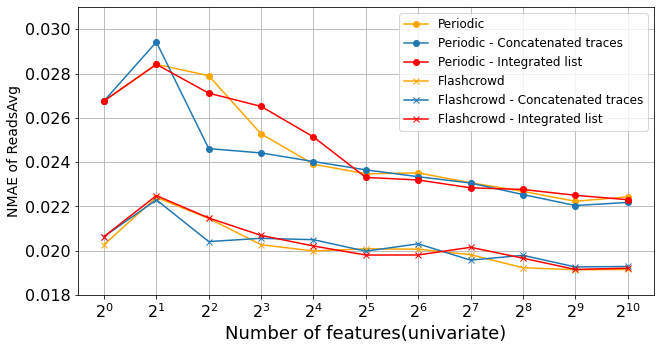

In [171]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,P_pc_nmae,marker='o',label = 'Periodic', c ='orange')
plt.plot(klist,PC_pc_nmae,marker='o',label = 'Periodic - Concatenated traces', c='#1f77b4')
plt.plot(klist,ippc_nmae,marker='o',label = 'Periodic - Integrated list',  c = 'r')


plt.plot(klist,F_pc_nmae,marker='x',label ='Flashcrowd' , c ='orange')
plt.plot(klist,FC_pc_nmae,marker='x',label = 'Flashcrowd - Concatenated traces', c='#1f77b4')
plt.plot(klist,ifpc_nmae,marker='x',label ='Flashcrowd - Integrated list' ,c = 'r')


font_size=18
plt.xlabel('Number of features(univariate)', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
#plt.legend(('Univariate','Tree-based','ARR','PCA'), loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
plt.legend(loc=1, shadow=False, fancybox=True, fontsize=font_size-6)

#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
ax.set_ylim(0.018,0.031)
plt.grid()
plt.savefig("./Fig/corr.png",dpi=300,bbox_inches='tight')

In [95]:
print(F_pc_nmae,FC_pc_nmae,P_pc_nmae,PC_pc_nmae)

[0.020277062947935267, 0.022411548069010554, 0.021462186504105214, 0.0202732589328317, 0.019991426770334598, 0.020089259222286146, 0.02007389899588217, 0.019825868427092594, 0.019234786154193478, 0.01914669993125033, 0.01915559791924279] [0.02064045027000908, 0.02229828975672332, 0.020416707156097953, 0.020562956320528826, 0.020500219537735013, 0.019982352399404626, 0.02031399009586142, 0.01957829009197728, 0.01979533622377406, 0.01927011381133581, 0.019292181311130124] [0.026763708389384123, 0.028415081298689228, 0.027903247129645984, 0.02527708881993441, 0.023908381418079674, 0.023474645887946233, 0.023517015072818847, 0.023070575142136944, 0.02268476104264498, 0.022233565943313296, 0.02243413148562209] [0.02676370838938411, 0.02942377949723019, 0.024612949908933344, 0.02441677336731104, 0.024028158132226297, 0.02365350574315446, 0.023343638611635197, 0.023058706046840245, 0.022540116517137, 0.02204403953476697, 0.02218205168478315]


In [151]:
print(ifpc_nmae,ippc_nmae)

[0.020640450270009082, 0.022491881652634698, 0.02148107354061064, 0.02069582088413735, 0.020216993210702746, 0.01980818801020005, 0.019811264429330358, 0.020157842549616983, 0.01966635034518895, 0.019158373884732637, 0.019215314447110353] [0.02676370838938413, 0.028415081298689235, 0.027114985642292273, 0.026517897057086858, 0.025138992937976126, 0.02331264069311882, 0.023196650989332844, 0.02284299562821392, 0.02276803638475735, 0.02250644760310101, 0.022306187721431475]


#### tree based

In [97]:
# Flash - feature list from flash
ftb = pd.read_csv('./Data/readF_t_b.csv')
ftb = ftb.iloc[:,0].tolist()

In [98]:
X_train_F_tb=X_train_F[ftb]
X_test_F_tb=X_test_F[ftb]

In [100]:
Ctb = pd.read_csv('./Data/readC_t_b.csv')
Ctb = Ctb.iloc[:,0].tolist()

# # flash - feature list from combined 


X_train_FC_tb=X_train_F[Ctb]
X_test_FC_tb=X_test_F[Ctb]

In [102]:
# peri - feature list from peri

ptb = pd.read_csv('./Data/readP_t_b.csv')
ptb= ptb.iloc[:,0].tolist()

X_train_P_tb=X_train_P[ptb ]
X_test_P_tb=X_test_P[ptb ]

In [103]:
# peri - feature list from combined 

X_train_PC_tb=X_train_P[Ctb]
X_test_PC_tb=X_test_P[Ctb]

In [ ]:
# X_train_F_tb        X_test_F_tb
# X_train_FC_tb       X_test_FC_tb
# X_train_P_tb        X_test_P_tb
# X_train_PC_tb        X_test_PC_tb

In [104]:
F_tb_nmae=[]
F_tb_time=[]
RF_training_f(klist,X_train_F_tb,Y_train_F,X_test_F_tb,Y_test_F,F_tb_nmae,F_tb_time)

1
2
4
8
16
32
64
128
256
512
1024


In [105]:
FC_tb_nmae=[]
FC_tb_time=[]
RF_training_f(klist,  X_train_FC_tb,Y_train_F,  X_test_FC_tb,Y_test_F,   FC_tb_nmae,FC_tb_time)

1
2
4
8
16
32
64
128
256
512
1024


In [106]:
P_tb_nmae=[]
P_tb_time=[]
RF_training_f(klist, X_train_P_tb,Y_train_P,    X_test_P_tb,Y_test_P    ,P_tb_nmae,P_tb_time)

1
2
4
8
16
32
64
128
256
512
1024


In [107]:
PC_tb_nmae=[]
PC_tb_time=[]
RF_training_f(klist, X_train_PC_tb,Y_train_P,    X_test_PC_tb,Y_test_P    ,PC_tb_nmae,PC_tb_time)

1
2
4
8
16
32
64
128
256
512
1024


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


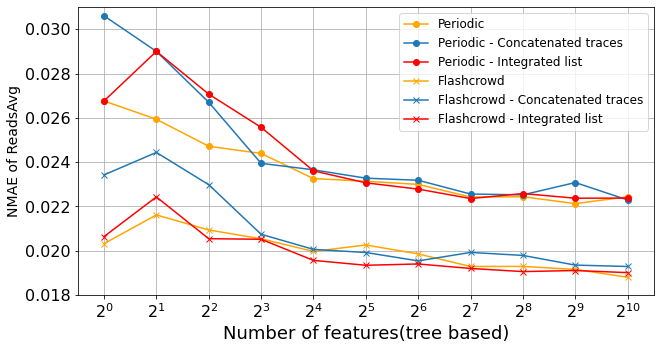

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,P_tb_nmae,marker='o',label = 'Periodic',c = 'orange')
plt.plot(klist,PC_tb_nmae,marker='o',label = 'Periodic - Concatenated traces',c='#1f77b4')
plt.plot(klist,iptb_nmae,marker='o',label = 'Periodic - Integrated list',  c = 'r')

plt.plot(klist,F_tb_nmae,marker='x',label ='Flashcrowd' , c ='orange')
plt.plot(klist,FC_tb_nmae,marker='x',label = 'Flashcrowd - Concatenated traces', c='#1f77b4')
plt.plot(klist,iftb_nmae,marker='x',label ='Flashcrowd - Integrated list' ,c = 'r')

font_size=18
plt.xlabel('Number of features(tree based)', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
#plt.legend(('Univariate','Tree-based','ARR','PCA'), loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
plt.legend(loc=1, shadow=False, fancybox=True, fontsize=font_size-6)

#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
ax.set_ylim(0.018,0.031)
plt.grid()
plt.savefig("./Fig/treebased.png",dpi=300,bbox_inches='tight')

In [113]:
print(F_tb_nmae,FC_tb_nmae,P_tb_nmae,PC_tb_nmae)

[0.02032328340227826, 0.021619507779640706, 0.020940280055683793, 0.020542574181756944, 0.019970567857113368, 0.020263123157850293, 0.019858828116895835, 0.01929240292364789, 0.019295068424585844, 0.019158668746804164, 0.018807187690312033] [0.023425161865765227, 0.024440347953139596, 0.02298337493770267, 0.02074552055105727, 0.020063813607150174, 0.01992290209234961, 0.019544246818232188, 0.01992585083732126, 0.019790787109628557, 0.019354332346007908, 0.019292231386736844] [0.026763708389384116, 0.02593753214414284, 0.024718152332471835, 0.024393955899237672, 0.02325940325012635, 0.023140194203197146, 0.022997079255157, 0.022426658173422438, 0.02244040805174139, 0.02212859535490206, 0.022437746346069147] [0.030606801662250452, 0.02900098125567222, 0.026704431929276393, 0.023947351587585455, 0.023655832192213753, 0.02327801011546559, 0.02318386421332421, 0.022561961798580187, 0.022524607445921073, 0.023080756938089506, 0.022293967215052796]


In [164]:
print(iftb_nmae,iptb_nmae)

[0.02064045027000908, 0.022432203987167, 0.020545795646186873, 0.020520338375735945, 0.01956689248626023, 0.019346242339734542, 0.0194050171852556, 0.019202473036151246, 0.01906107126500724, 0.01910956234535412, 0.019013853012148356] [0.02676370838938411, 0.02900041395290738, 0.027072183462158936, 0.025573392157819386, 0.023608596319418355, 0.023067911463399805, 0.022784683256739238, 0.022358344746962376, 0.02258445486189748, 0.02237270902947385, 0.022379928227355027]


In [80]:
#  Pearson correlation
pc = pd.read_csv('./Data/readC_p_c.csv')
pc_f= pc.iloc[:,0].tolist()

X_train_pc=X_train[pc_f]
X_test_pc=X_test[pc_f]

pc_nmae=[]
pc_time=[]

# tree based
tb = pd.read_csv('./Data/readC_t_b_new.csv')
tb_f=tb.iloc[0:,0].tolist()
X_train_tb=X_train[tb_f]
X_test_tb=X_test[tb_f]
tb_nmae=[]
tb_time=[]

0        1_i127_intr.s
1        4_i124_intr.s
2        0_i127_intr.s
3         17_TxPacktes
4       17_TxPacktes.1
             ...      
1708      3_all_..idle
1709      1_cpu0_.idle
1710      1_all_..idle
1711     3_cpu15_.idle
1712     3_cpu13_.idle
Name: Unnamed: 0, Length: 1713, dtype: object

In [83]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [84]:
klist=[1,2,4,8,16,32,64,128,256,512,1024]

def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        print(k)
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [87]:
r_pc_nmae=[]
r_pc_time=[]
RF_training_f(klist,X_train_pc,Y_train,X_test_pc,Y_test,r_pc_nmae,r_pc_time)

1
2
4
8
16
32
64
128
256
512
1024


In [77]:
r_tb_nmae=[]
r_tb_time=[]
RF_training_f(klist,X_train_tb,Y_train,X_test_tb,Y_test, r_tb_nmae,r_tb_time)

1
2
4
8
16
32
64
128
256
512
1024


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


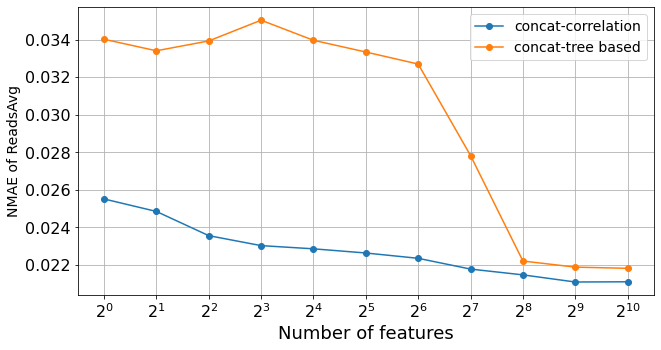

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_nmae,marker='o',label = 'concat-correlation')
plt.plot(klist,r_tb_nmae,marker='o',label = 'concat-tree based')
#plt.plot(klist,r_arr_nmae,marker='o')
#plt.plot(klist,r_pca_nmae,marker='o')


font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
#plt.legend(('Univariate','Tree-based','ARR','PCA'), loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
plt.legend(loc=1, shadow=False, fancybox=True, fontsize=font_size-4)

#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
#plt.savefig("./Fig/flash_NMAE.png",dpi=300,bbox_inches='tight')

In [93]:
print(r_pc_nmae,r_tb_nmae,)

[0.025520552301454693, 0.024854941478627646, 0.02356434096796268, 0.02303352025190916, 0.022862586901272602, 0.022640101745729387, 0.02235641818909567, 0.021782497725780354, 0.0214740459257756, 0.021093638610406088, 0.02110544366004423] [0.034032458680863596, 0.033418457523091014, 0.0339423534268679, 0.03504849561183565, 0.03397728524029291, 0.03335185524677846, 0.03271091103504483, 0.02783304627846963, 0.022212328474266883, 0.021886874596480435, 0.021822693806126274]


In [90]:
pearsonr([[1,2,3,4,6,7,4,4,32,2],[1,2,3,4,6,7,4,4,32,2]], [3,5,3,2,7,7,1,4,6,7])

ValueError: x and y must have the same length.

In [7]:
train= train.loc[:, (train != 0).any(axis=0)]

,Unnamed: 0,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,...,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1,ReadsAvg,WritesAvg
0,1,2016-11-22 08:52:37,0.84,0.29,0.17,0.00,98.70,6.00,0.00,0.0,...,897,1224,495878,603664,1224,898,405288,668193,59.3928,113.4178
1,2,2016-11-22 08:52:38,1.29,0.50,0.21,0.00,97.99,7.00,2.00,1.0,...,891,1236,488287,577703,1259,895,411853,665647,58.3325,109.1802
2,7,2016-11-22 08:52:46,1.08,0.58,0.13,0.04,98.17,2.00,2.00,0.0,...,922,1218,503116,642206,1220,922,417946,751137,58.8779,114.7778
3,15,2016-11-22 08:52:55,0.71,0.29,0.17,0.04,98.79,3.00,2.00,1.0,...,914,1284,492803,601726,1278,914,415035,636155,57.3831,107.6095
4,16,2016-11-22 08:52:56,0.84,0.21,0.04,0.04,98.87,4.00,2.00,1.0,...,863,1216,498189,533934,1216,864,381893,640162,52.5361,106.5753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,19425,2016-11-22 21:20:27,0.17,0.17,0.00,0.00,99.67,0.99,0.99,0.0,...,983,1417,489672,578816,1413,973,459845,595712,53.3583,107.0919
6801,19429,2016-11-22 21:20:33,0.17,0.17,0.00,0.00,99.67,0.00,1.00,0.0,...,990,1383,489621,547115,1383,990,451541,604013,53.4440,106.7679
6802,19430,2016-11-22 21:20:34,0.04,0.33,0.00,0.00,99.62,0.00,0.00,0.0,...,1034,1696,473274,650676,1695,1034,533322,577530,53.8170,106.2969
6803,19436,2016-11-22 21:20:42,0.08,0.29,0.00,0.00,99.62,0.00,0.00,0.0,...,326,445,173213,258979,444,326,161897,287605,53.5572,107.2379


### Feature selection

In [10]:
start_time = time.time()
corr=train_.corr()
corr['sq_r'] = corr.ReadsAvg**2
corr_r = corr.sort_values('sq_r',ascending=False)
end_time = time.time()
print(end_time-start_time)

36.92004632949829


In [11]:
corr_r['sq_r'].to_csv("./Flash/read_p_c.csv")
#corr_r['sq_r'].head(64).to_csv("read_p_c.csv")

In [12]:
>>> from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

Y_train_r_int=Y_train_r.astype(int)
start_time = time.time()
clf=ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train, Y_train_r_int)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
end_time = time.time()
print(end_time-start_time)

7.136568069458008


In [13]:
#feat_importances.nlargest(64).to_csv("read_t_b.csv")
feat_importances.nlargest(200).to_csv("./Flash/read_t_b.csv")

In [15]:
from numpy import dot
from numpy.linalg import norm

exp=X_train
exp= exp.loc[:, (exp != 0).any(axis=0)]
exp.loc[-1] = range(0,exp.shape[1])

#arr=exp[flist16]
arr=exp
arr_d_x=arr.shape[0]
arr_d_y=arr.shape[1]

In [16]:
start_time = time.time()
dotab=np.zeros((arr_d_y,arr.shape[1]))
for i in range(0,arr_d_y):
    a=exp.iloc[0:arr_d_x-1,i]
    for j in range(0,i+1):
        b=arr.iloc[0:arr_d_x-1,j]
        dotab[i,j]=dot(a, b)
end_time = time.time()
print(end_time-start_time)

176.32039737701416


In [17]:
start_time = time.time()
for i in range(0,arr_d_y):
    for j in range(i+1,arr_d_y):
        dotab[i,j]=dotab[j, i]
narr=np.zeros(arr_d_y)
for i in range(0,arr_d_y):
    a=arr.iloc[0:arr_d_x-1,i]
    na=norm(a)
    narr[i]=na
end_time = time.time()
print(end_time-start_time)
narr

0.7387564182281494


array([9.24715510e+05, 5.35465713e+01, 6.59352129e+01, ...,
       2.48192934e+05, 1.15320056e+08, 2.27662592e+08])

In [18]:
start_time = time.time()
for i in range(0,arr_d_y):
    mean=arr.iloc[:,i].mean()
    r=0.0
    for j in range(0,arr_d_x-1):
        r=r+np.abs(arr.iloc[j,i]-mean)
    s=0.0
    for j in range(0,arr_d_y):
        na=narr[i]
        nb=narr[j]
        if((na>0)and(nb>0)):
            s=s+np.abs(dotab[i,j]/(na*nb))
    if(s!=0):
        score=r/s
    else:
        score=math.inf
    arr.iloc[-1,i]=score
end_time = time.time()
print(end_time-start_time)
arr

295.49398612976074


,Unnamed: 0,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,1.000000,0.840000,0.290000,1.700000e-01,0.000000,98.700000,6.000000,0.000000,0.000000e+00,0.000000,...,1.337184e+06,1.797629e+06,897.000000,1224.00000,4.958780e+05,6.036640e+05,1224.000000,898.000000,4.052880e+05,6.681930e+05
1,2.000000,1.290000,0.500000,2.100000e-01,0.000000,97.990000,7.000000,2.000000,1.000000e+00,0.000000,...,1.348824e+06,1.743474e+06,891.000000,1236.00000,4.882870e+05,5.777030e+05,1259.000000,895.000000,4.118530e+05,6.656470e+05
2,7.000000,1.080000,0.580000,1.300000e-01,0.040000,98.170000,2.000000,2.000000,0.000000e+00,0.000000,...,1.337640e+06,1.998145e+06,922.000000,1218.00000,5.031160e+05,6.422060e+05,1220.000000,922.000000,4.179460e+05,7.511370e+05
3,15.000000,0.710000,0.290000,1.700000e-01,0.040000,98.790000,3.000000,2.000000,1.000000e+00,0.000000,...,1.321115e+06,1.822001e+06,914.000000,1284.00000,4.928030e+05,6.017260e+05,1278.000000,914.000000,4.150350e+05,6.361550e+05
4,16.000000,0.840000,0.210000,4.000000e-02,0.040000,98.870000,4.000000,2.000000,1.000000e+00,0.000000,...,1.347406e+06,1.798165e+06,863.000000,1216.00000,4.981890e+05,5.339340e+05,1216.000000,864.000000,3.818930e+05,6.401620e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,19429.000000,0.170000,0.170000,0.000000e+00,0.000000,99.670000,0.000000,1.000000,0.000000e+00,0.000000,...,7.720500e+05,5.328200e+05,990.000000,1383.00000,4.896210e+05,5.471150e+05,1383.000000,990.000000,4.515410e+05,6.040130e+05
6802,19430.000000,0.040000,0.330000,0.000000e+00,0.000000,99.620000,0.000000,0.000000,0.000000e+00,0.000000,...,5.116220e+05,7.270460e+05,1034.000000,1696.00000,4.732740e+05,6.506760e+05,1695.000000,1034.000000,5.333220e+05,5.775300e+05
6803,19436.000000,0.080000,0.290000,0.000000e+00,0.000000,99.620000,0.000000,0.000000,0.000000e+00,0.000000,...,1.749840e+05,2.227580e+05,326.000000,445.00000,1.732130e+05,2.589790e+05,444.000000,326.000000,1.618970e+05,2.876050e+05
6804,19442.000000,0.130000,0.250000,4.000000e-02,0.000000,99.580000,0.000000,2.000000,1.000000e+00,0.000000,...,1.741730e+05,2.164070e+05,298.000000,403.00000,1.761570e+05,2.077190e+05,409.000000,302.000000,1.366400e+05,2.938080e+05


In [19]:
score=arr.iloc[-1,:]
score=score.sort_values(ascending=False)
score.to_csv("./Flash/read_arr.csv")
#score.head(64).to_csv("read_arr.csv")

### PCA

In [23]:
pca = PCA()
start_time = time.time()
X_train_r=StandardScaler().fit_transform(X_train)
X_test_r = StandardScaler().fit_transform(X_test)
X_train_pca = pca.fit_transform(X_train_r)[:,:]
X_test_pca= pca.fit_transform(X_test_r)[:,:]
end_time = time.time()
print(end_time-start_time)

5.562438726425171


### Read files

In [27]:
#  Pearson correlation
pc = pd.read_csv('./Flash/read_p_c.csv')
pc_f= pc.iloc[2:,0].tolist()
X_train_pc=X_train[pc_f]
X_test_pc=X_test[pc_f]
pc_nmae=[]
pc_time=[]

# tree based
tb = pd.read_csv('./Flash/read_t_b.csv')
tb_f=tb.iloc[0:,0].tolist()
X_train_tb=X_train[tb_f]
X_test_tb=X_test[tb_f]
tb_nmae=[]
tb_time=[]

# ARR
arr = pd.read_csv('./Flash/read_arr.csv')
arr_f=arr.iloc[0:,0].tolist()
X_train_arr=X_train[arr_f]
X_test_arr=X_test[arr_f]
arr_nmae=[]
arr_time=[]

### Pearson correlation, tree based, ARR

In [24]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [28]:
klist=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]

def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [29]:
r_pc_nmae=[]
r_pc_time=[]
RF_training_f(klist,X_train_pc,Y_train_r,X_test_pc,Y_test_r,r_pc_nmae,r_pc_time)

In [30]:
r_tb_nmae=[]
r_tb_time=[]
RF_training_f(klist,X_train_tb,Y_train_r,X_test_tb,Y_test_r, r_tb_nmae,r_tb_time)

In [34]:
r_arr_nmae=[]
r_arr_time=[]
RF_training_f(klist,X_train_arr,Y_train_r,X_test_arr,Y_test_r, r_arr_nmae,r_arr_time)

### PCA

In [32]:
def RF_training_pca(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_RF_reg(X_train_f[:,0:k],Y_train_r,X_test_f[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

r_pca_nmae=[]
r_pca_time=[]
RF_training_pca(klist ,X_train_pca,Y_train_r,X_test_pca,Y_test_r, r_pca_nmae,r_pca_time)

### Plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


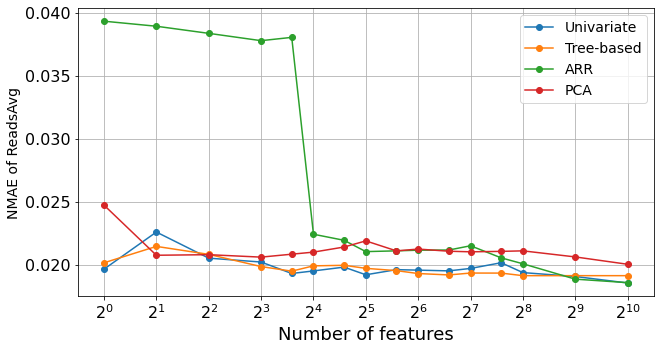

In [38]:
#a=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
a = [0,1,3,7,9,11,15,19,21,23,24,25,26,27,28,29]

def sortindex(list,indexs):
    _ = []
    for a in indexs:
        _.append(list[a])
    return _

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
# plt.plot(klist,r_pc_nmae,marker='o')
# plt.plot(klist,r_tb_nmae,marker='o')
# plt.plot(klist,r_arr_nmae,marker='o')
# plt.plot(klist,r_pca_nmae,marker='o')
plt.plot(sortindex(klist,a),sortindex(r_pc_nmae,a),marker='o')
plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
plt.plot(sortindex(klist,a),sortindex(r_arr_nmae,a),marker='o')
plt.plot(sortindex(klist,a),sortindex(r_pca_nmae,a),marker='o')


font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
plt.legend(('Univariate','Tree-based','ARR','PCA'), 
           loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
plt.savefig("./Fig/flash_NMAE.png",dpi=300,bbox_inches='tight')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


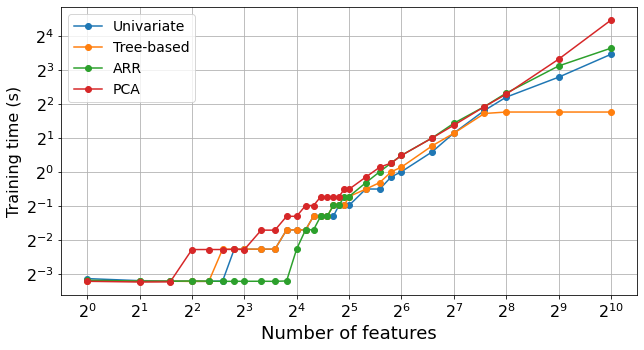

In [37]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_arr_time,marker='o')
plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
plt.legend(('Univariate','Tree-based',
            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_xlim(0,200)
#ax.set_ylim(0,6)

plt.grid()
plt.savefig("./Fig/flash_time.png",dpi=300,bbox_inches='tight')

In [39]:
X_train_arr.shape

(6805, 1709)

In [40]:
X_test_arr.shape

(2917, 1709)

In [41]:
print(r_pc_time)
print(r_tb_time)
print(r_arr_time)
print(r_pca_time)

[0.11452531814575195, 0.10979127883911133, 0.10921192169189453, 0.10827517509460449, 0.10829615592956543, 0.10889410972595215, 0.20860624313354492, 0.20870256423950195, 0.20844745635986328, 0.20857024192810059, 0.30943799018859863, 0.30872106552124023, 0.30921483039855957, 0.40937256813049316, 0.40981316566467285, 0.4095139503479004, 0.4095480442047119, 0.5094587802886963, 0.509758710861206, 0.5098381042480469, 0.7121121883392334, 0.7111854553222656, 0.9131801128387451, 1.0127735137939453, 1.5170748233795166, 2.2239646911621094, 3.531222105026245, 4.63395619392395, 6.958432912826538, 11.095179557800293]
[0.10948705673217773, 0.10822200775146484, 0.1085512638092041, 0.10816693305969238, 0.10825753211975098, 0.20850634574890137, 0.20871329307556152, 0.2087399959564209, 0.20907998085021973, 0.20880556106567383, 0.3091146945953369, 0.30948638916015625, 0.30909132957458496, 0.40970897674560547, 0.4099256992340088, 0.40964245796203613, 0.5098748207092285, 0.509984016418457, 0.510494709014892

In [42]:
print(r_pc_nmae)
print(r_tb_nmae)
print(r_arr_nmae)
print(r_pca_nmae)

[0.01966242727451902, 0.022604057594249792, 0.020674536203741156, 0.02053472092690724, 0.020299915713597322, 0.020210262492725437, 0.02019107602772368, 0.020226513992583437, 0.019789018603888674, 0.019319448797027756, 0.019572317677866664, 0.01952141072170773, 0.020082866193033677, 0.019776553279752505, 0.019638403315889844, 0.019823669719809454, 0.019832932587365768, 0.01962005038991766, 0.019464075166313825, 0.019216156675198, 0.019333417070843288, 0.01962413127746034, 0.01948698586361028, 0.019583935077712875, 0.01952619828516504, 0.019719660319135995, 0.020170935981174823, 0.019388282949859142, 0.01907994797741737, 0.018563775197486358]
[0.02016640802024721, 0.021466360277945983, 0.02240561435525657, 0.020834221814860054, 0.020933924299587577, 0.020279510283797257, 0.020008885589301556, 0.01986658665593128, 0.020111753345951004, 0.019503356971947567, 0.019496258590030315, 0.01992369322526285, 0.01935971295472927, 0.019724750159076952, 0.019834445209892606, 0.019967849711986622, 0.0